<a href="https://colab.research.google.com/github/BhavaniBelli/Extraction-of-Tables-from-pdf-/blob/main/voterid_extraction_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pillow

In [ ]:
pip install pytesseract

Enter the path to the image' (e.g., 'id1.jpg'): /content/image_2025_01_09T05_20_09_466Z.png


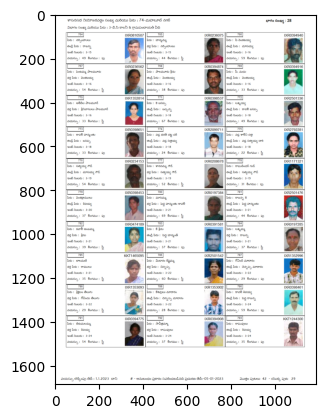

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def show_image(image_path):
    # Open the image using PIL
    img = Image.open(image_path)

    # Display the image using matplotlib
    plt.imshow(img)
    plt.axis('on')  # Turn on axis
    plt.show()

# Example usage:
image_path = input("Enter the path to the image' (e.g., 'id1.jpg'): ")  # Path to the input image

# Show the image
show_image(image_path)

In [1]:
!apt-get install tesseract-ocr
!apt-get install libtesseract-dev
!apt-get install tesseract-ocr-tel

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libtesseract-dev is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-tel is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


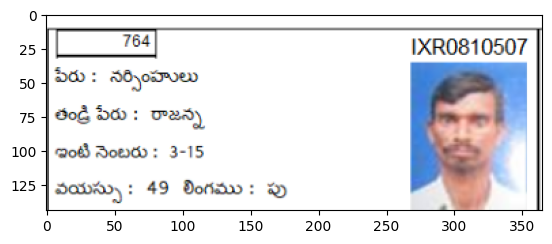

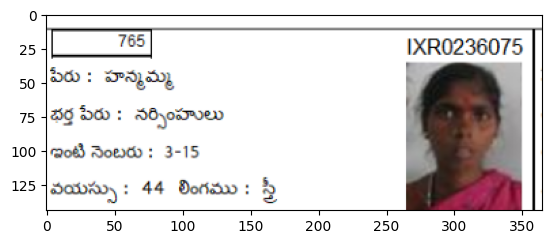

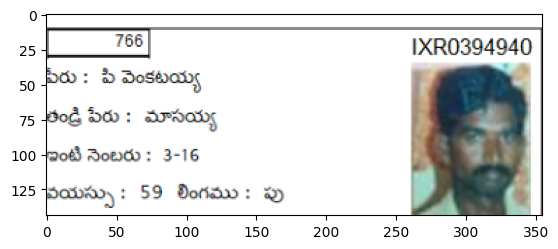

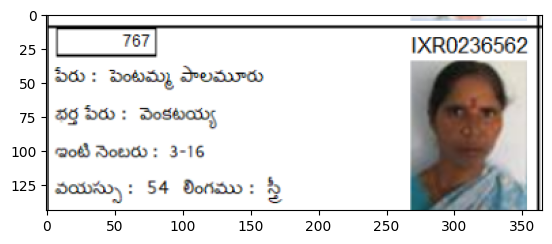

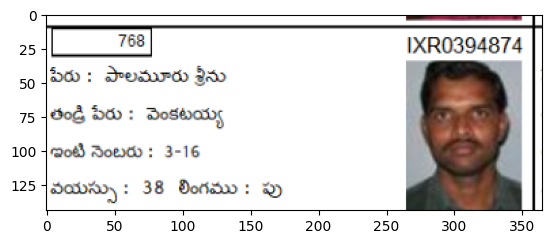

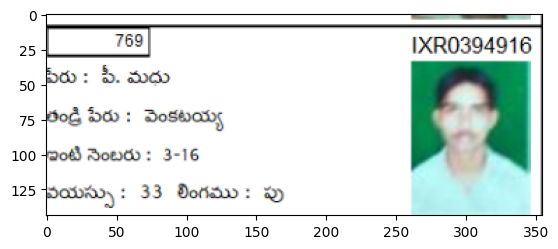

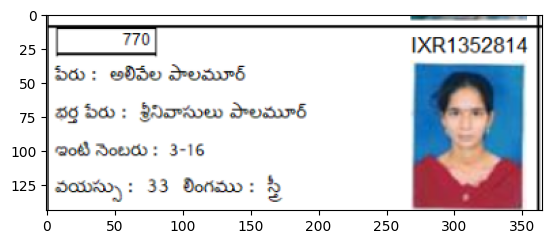

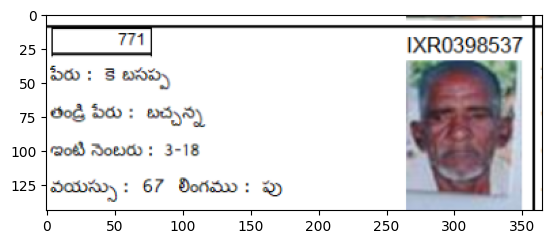

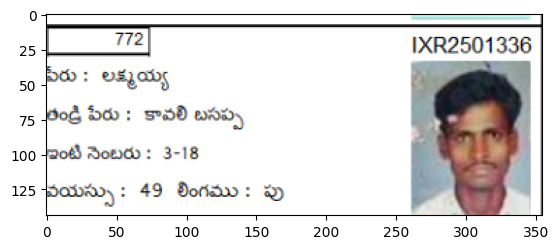

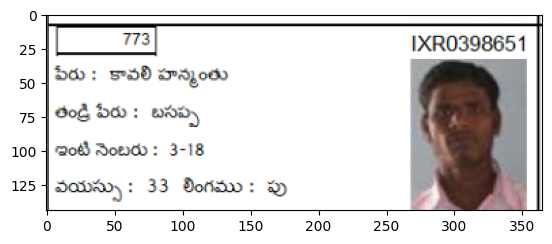

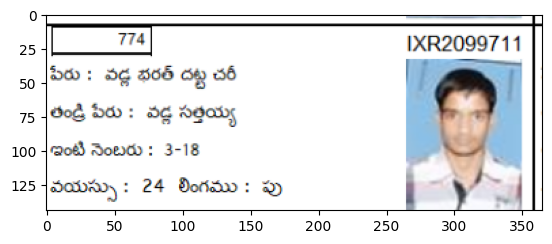

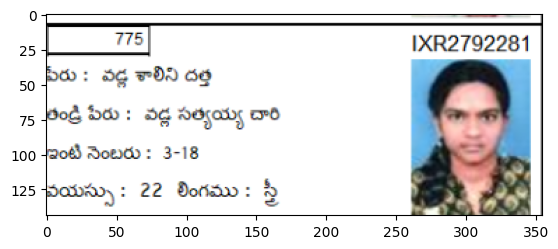

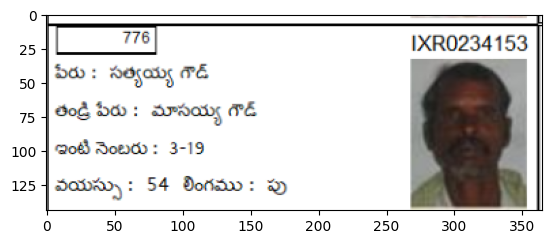

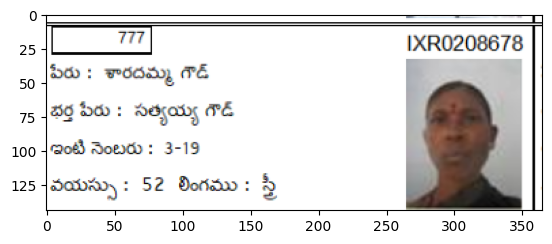

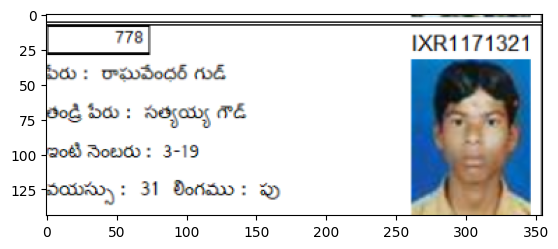

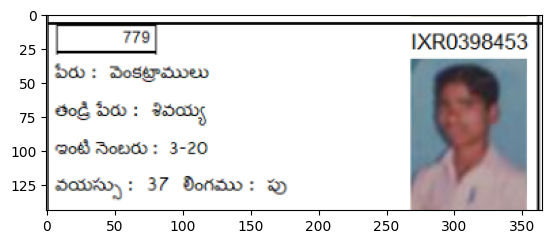

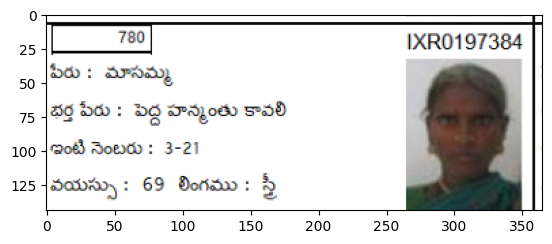

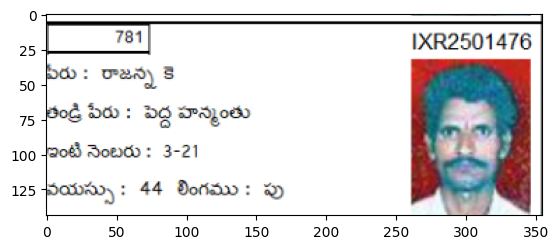

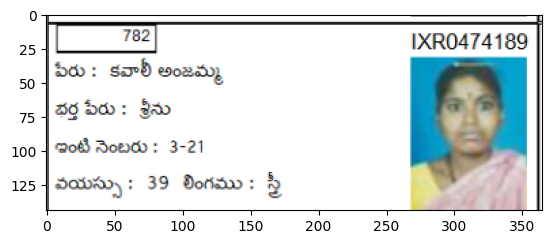

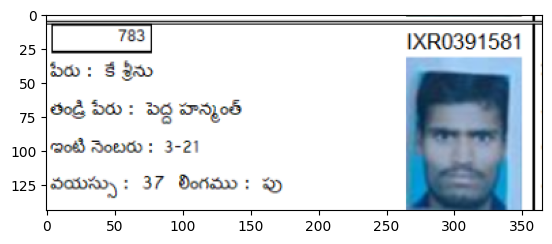

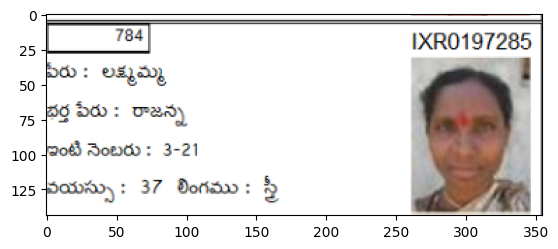

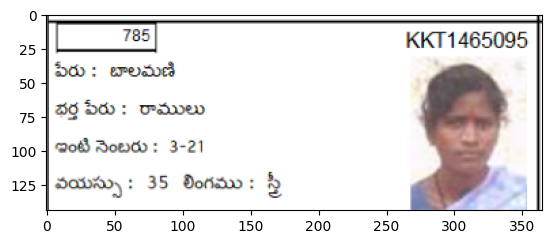

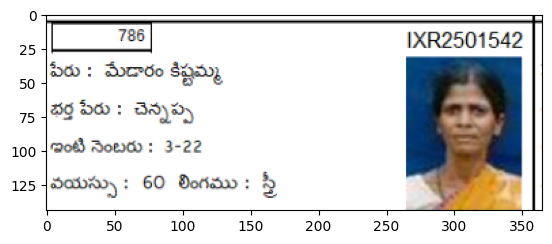

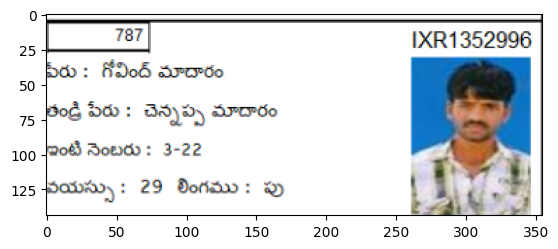

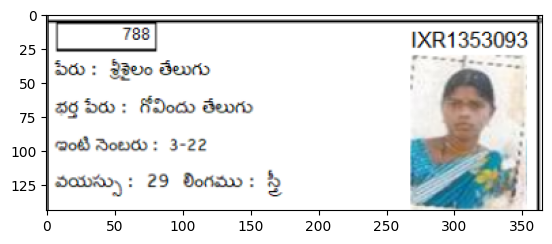

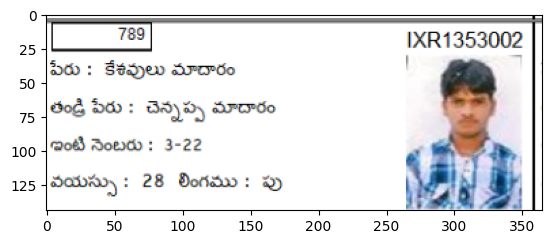

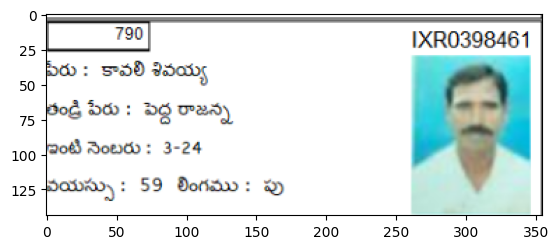

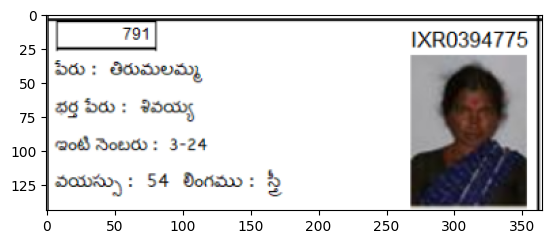

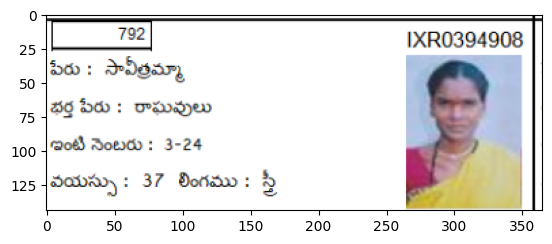

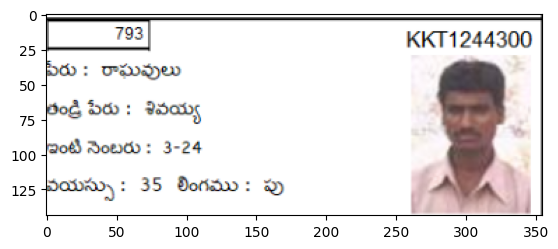

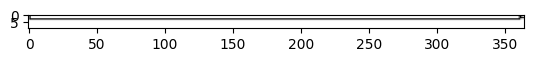

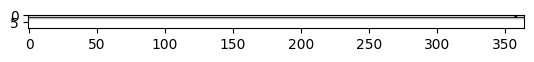

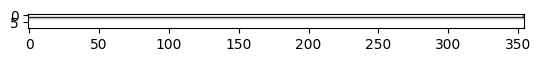

In [5]:
import numpy as np
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt

# Load the image (ensure to replace 'image_path' with the correct path to your image)
image_path = '/content/img1.png'  # Replace with your image path
crop_image = np.array(Image.open(image_path))  # Convert image to numpy array

# Step 7: Define sub-image parameters
sub_width, sub_height = 365, 144  # Size of each sub-image

# Get cropped image dimensions
crop_height, crop_width = crop_image.shape[:2]  # Shape of the image (height, width)

# Store extracted sub-images data
sub_images_data = []

# Iterate over the cropped image to extract sub-images
for row in range(0, crop_height, sub_height):
    for col in range(0, crop_width, sub_width):
        # Ensure we do not exceed image boundaries
        row_end = min(row + sub_height, crop_height)
        col_end = min(col + sub_width, crop_width)

        # Extract the sub-image
        sub_image = crop_image[row:row_end, col:col_end]

        # Perform OCR on the sub-image to extract text in Telugu
        ocr_text = pytesseract.image_to_string(sub_image, lang='tel')  # Use Telugu for OCR

        # Append the extracted text from each sub-image
        sub_images_data.append(ocr_text.strip())  # Remove leading/trailing whitespace

        # Display the sub-image (optional)
        plt.imshow(sub_image)
        plt.axis('on')  # Turn off the axis
        plt.show()



In [6]:

# Print out the extracted text for each sub-image
for idx, text in enumerate(sub_images_data):
    print(f"Text from sub-image {idx + 1}:")
    print(text)
    print("-" * 50)


Text from sub-image 1:
తండ్రి పేరు : రాజన్న
ఇంటి నెంబరు : 3-15
వయస్సు: 49 లింగము: పు
--------------------------------------------------
Text from sub-image 2:
భర్త పేరు : నర్చింహులు,
ఇంటి నెంబరు : 3-15.

వయస్సు: 44 లింగము : స్త్రీ

14౧0236075
--------------------------------------------------
Text from sub-image 3:

--------------------------------------------------
Text from sub-image 4:
పేరు : పెంటమ్మ పాలమూరు.
భర్త పేరు : వెంకటయ్య

ఇంటి నెంబరు : 3-16

వయస్సు: 54 లింగము : స్త్రీ
--------------------------------------------------
Text from sub-image 5:
పేరు : పాలమూరు శ్రీను
తండ్రి పేరు : వెంకటయ్య

వయస్సు : 38 లింగము : పు

1420394874
--------------------------------------------------
Text from sub-image 6:
14౧0394916

పేరు : పీ. మధు,
తండ్రి పేరు : వెంకటయ్య
ఇంటి నెంబరు : 3-16 |

వయస్సు : 33 లింగము: పు
--------------------------------------------------
Text from sub-image 7:
14౧1352814
--------------------------------------------------
Text from sub-image 8:
(౧౦౩98537
పేరు:కె బసప్ప

తండ్ర

In [12]:
import pandas as pd
import re

# Your text data
text = """
Text from sub-image 1:
తండ్రి పేరు : రాజన్న
ఇంటి నెంబరు : 3-15
వయస్సు: 49 లింగము: పు
--------------------------------------------------
Text from sub-image 2:
భర్త పేరు : నర్చింహులు,
ఇంటి నెంబరు : 3-15.
వయస్సు: 44 లింగము : స్త్రీ
14౧0236075
--------------------------------------------------
Text from sub-image 3:
--------------------------------------------------
Text from sub-image 4:
పేరు : పెంటమ్మ పాలమూరు.
భర్త పేరు : వెంకటయ్య
ఇంటి నెంబరు : 3-16
వయస్సు: 54 లింగము : స్త్రీ
--------------------------------------------------
Text from sub-image 5:
పేరు : పాలమూరు శ్రీను
తండ్రి పేరు : వెంకటయ్య
వయస్సు : 38 లింగము : పు
1420394874
--------------------------------------------------
Text from sub-image 6:
14౧0394916
పేరు : పీ. మధు,
తండ్రి పేరు : వెంకటయ్య
ఇంటి నెంబరు : 3-16 |
వయస్సు : 33 లింగము: పు
--------------------------------------------------
Text from sub-image 7:
14౧1352814
--------------------------------------------------
Text from sub-image 8:
(౧౦౩98537
పేరు:కె బసప్ప
తండ్రి పేరు : బచ్చన్న
ఇంటి నెంబరు : 3-18
వయస్సు: 67 లింగము : పు
--------------------------------------------------
Text from sub-image 9:
14౧2501336
--------------------------------------------------
Text from sub-image 10:
10398651
--------------------------------------------------
Text from sub-image 11:
1౧20౦99711
--------------------------------------------------
Text from sub-image 12:
౮2792281
పేరు : వడ్ల శాలిని దత్త
తండ్రి పేరు : వడ్ల సత్యయ్య చారి
ఇంటి నెంబరు : 3-18
వయస్సు: 22 లింగము: స్త్రీ
--------------------------------------------------
Text from sub-image 13:
౧౮౯౦234153
--------------------------------------------------
Text from sub-image 14:
గ 1౧0౦208678
పేరు : శారదమ్మ గౌడ్‌
భర్త పేరు : సత్యయ్య గౌడ్‌
ఇంటి నెంబరు : 3-19
వయస్సు: 52 లింగము: స్త్రీ
--------------------------------------------------
Text from sub-image 15:
ర్‌ 1171321
పేరు : రాఘవేంధర్‌ గుడ్‌,
తండ్రి పేరు : సత్యయ్య గౌడ్‌
ఇంటి నెంబరు : 3-19
వయస్సు: 31 లింగము: పు
--------------------------------------------------
Text from sub-image 16:
తండ్రి పేరు : శివయ్య
ఇంటి నెంబరు : 3-20.
వయస్సు: 37 లింగము : పు
--------------------------------------------------
Text from sub-image 17:
పేరు : మాసమ్మ
భర్త పేరు : పెద్ద హన్మంతు కావలి
ఇంటి నెంబరు : 3-21
వయస్సు: 69 లింగము: స్త్రీ
--------------------------------------------------
Text from sub-image 18:
14౧2501476
పేరు : రాజన్నకె
తండ్రి పేరు : పెద్ద హన్మంతు
ఇంటి నెంబరు : 3-21
వయస్సు : 44 లింగము: పు
--------------------------------------------------
Text from sub-image 19:
పేరు : కవాలీ అంజమ్మ
భర్త పేరు: శ్రీను
ఇంటి నెంబరు : 3-21
వయస్సు: 39 లింగము: స్త్రీ
--------------------------------------------------
Text from sub-image 20:
పేరు: కే శ్రీను
తండ్రి పేరు : పెద్ద హన్మంత్‌
ఇంటి నెంబరు : 3-21
వయస్సు: 37 లింగము: పు
14౧0391581
--------------------------------------------------
Text from sub-image 21:
0న ౧0197285
పేరు : లక్ష్మమ్మ
భర్త పేరు : రాజన్న
ఇంటి నెంబరు : 3-21
వయస్సు: 37 లింగము: స్త్రీ
--------------------------------------------------
Text from sub-image 22:
పేరు : బాలమణి
భర్తపేరు : రాములు
ఇంటి నెంబరు: 3-21
వయస్సు: 35 లింగము : స్త్రీ
--------------------------------------------------
Text from sub-image 23:
1౫౧2501542
పేరు : మేడారం కిష్టమ్మ
భర్తపేరు : చెన్నప్ప
ఇంటి నెంబరు : 3-22
వయస్సు: 60 లింగము: స్త్రీ
--------------------------------------------------
Text from sub-image 24:
14౧1352996
పేరు : గోవింద్‌ మాదారం
తండ్రి పేరు : చెన్నప్ప మాదారం
ఇంటి నెంబరు : 3-22
--------------------------------------------------
Text from sub-image 25:
--------------------------------------------------
Text from sub-image 26:
--------------------------------------------------
Text from sub-image 27:
పేరు : కావలి శివయ్య
తండ్రి పేరు : పెద్ద రాజన్న
ఇంటి నెంటరు : 3-24
వయస్సు: 59 లింగము: పు
--------------------------------------------------
Text from sub-image 28:
౧0394775
భర్త పేరు : శివయ్య
ఇంటి నెంటరు : 3-24
వయస్సు: 54 లింగము : స్త్రీ
"""

# Splitting the text into individual blocks (sub-images)
blocks = text.split("--------------------------------------------------")

# List to store extracted data
data = []

# Iterate over each block and extract details
for block in blocks:
    block = block.strip()

    if not block:
        continue

    # Extract relevant information from each block
    lines = block.split("\n")

    # Initialize variables
    voterid = ""
    peru = ""
    thandri_bartha_peru = ""
    vayasu = ""
    lingam = ""
    inti_number = ""

    for line in lines:
        line = line.strip()

        # Extract Voter ID (assuming it contains only numbers and starts with 14, 1౧, etc.)
        if re.match(r"^[0-9౦-౯]+$", line.strip()):
            voterid = line.strip()

        # Extract Name
        if "పేరు" in line and "భర్త" not in line and "తండ్రి" not in line:
            match = re.search(r"పేరు\s*[:：]?\s*(.*)", line)
            if match:
                peru = match.group(1).strip()

        # Extract Father/Husband Name
        if "తండ్రి పేరు" in line or "భర్త పేరు" in line:
            match = re.search(r"(?:తండ్రి పేరు|భర్త పేరు)\s*[:：]?\s*(.*)", line)
            if match:
                thandri_bartha_peru = match.group(1).strip()

        # Extract House Number
        if "ఇంటి నెంబరు" in line:
            match = re.search(r"ఇంటి నెంబరు\s*[:：]?\s*(.*)", line)
            if match:
                inti_number = match.group(1).strip()

        # Extract Age & Gender (Fixed Extraction)
        if "వయస్సు" in line:
            match = re.search(r"వయస్సు\s*[:：]?\s*(\d+)\s*లింగము[:：]?\s*(\S+)", line)
            if match:
                vayasu = match.group(1).strip()  # Extract age
                lingam = match.group(2).strip()  # Extract gender

    # Append extracted details if any field is populated
    if any([voterid, peru, thandri_bartha_peru, vayasu, lingam, inti_number]):
        data.append([voterid, peru, thandri_bartha_peru, vayasu, lingam, inti_number])

# Create DataFrame
columns = ["ఓటర్ ఐడి", "పేరు", "తండ్రి/భర్త పేరు", "వయస్సు", "లింగం", "ఇంటి నంబర్"]
df = pd.DataFrame(data, columns=columns)

# Display DataFrame
df


,ఓటర్ ఐడి,పేరు,తండ్రి/భర్త పేరు,వయస్సు,లింగం,ఇంటి నంబర్
0,,,రాజన్న,49,పు,3-15
1,14౧0236075,,"నర్చింహులు,",44,:,3-15.
2,,పెంటమ్మ పాలమూరు.,వెంకటయ్య,54,:,3-16
3,1420394874,పాలమూరు శ్రీను,వెంకటయ్య,38,:,
4,14౧0394916,"పీ. మధు,",వెంకటయ్య,33,పు,3-16 |
5,14౧1352814,,,,,
6,,కె బసప్ప,బచ్చన్న,67,:,3-18
7,14౧2501336,,,,,
8,10398651,,,,,
9,1౧20౦99711,,,,,


In [18]:
import pytesseract
from PIL import Image
import pandas as pd
import re

# Set Tesseract path (if needed)
# pytesseract.pytesseract.tesseract_cmd = r'<your_tesseract_executable_path>'

def extract_voter_data(image_path):
    # Load image
    img = Image.open(image_path)

    # OCR with Telugu language
    custom_config = r'--oem 3 --psm 6 -l tel'
    text = pytesseract.image_to_string(img, config=custom_config)

    # Print raw OCR output for debugging
    print("Raw OCR Output:")
    print(text)

    # Process text
    lines = [line.strip() for line in text.split('\n') if line.strip()]

    data = []
    for line in lines:
        # Split columns using multiple spaces
        columns = re.split(r'\s{2,}', line)

        # Basic validation
        if len(columns) >= 6:
            # Extract required fields
            voter_id = columns[0]
            name = columns[1]
            parent_name = columns[2]
            age = columns[3]
            gender = columns[4]
            house_no = columns[5]

            data.append([voter_id, name, parent_name, age, gender, house_no])
        else:
            print(f"Skipping line due to insufficient columns: {line}")

    # Create DataFrame
    df = pd.DataFrame(data, columns=[
        'ఓటర్ ఐడి',
        'పేరు',
        'తండ్రి/భర్త పేరు',
        'వయస్సు',
        'లింగం',
        'ఇంటి నంబర్'
    ])

    return df, text  # Return both DF and raw text for verification

# Usage
image_path = '/content/image_2025_01_09T05_20_09_466Z.png'
df, raw_text = extract_voter_data(image_path)

# Save results
df.to_excel('voter_data.xlsx', index=False)
with open('raw_ocr_output.txt', 'w', encoding='utf-8') as f:
    f.write(raw_text)

print("Data Extraction Complete!")
df.head()

Raw OCR Output:
శాసనసభ నియోజకవర్గం సంఖ్య మరియు పేరు : 74-మహబూబ్‌ నగర్‌ భాగం సంఖ్య : 28
విభాగం సంఖ్య మరియు పేరు : 3-బి.సి కాలనీ & గ్రామపంచాయతి వీధి
1౧0౦810507 14౧0236075 ౧౧౦౩394940
పేరు : నర్సింహులు పేరు : హన్మమ్మ | పేరు: పి వెంకటయ్య /
తండ్రి పేరు : రాజన్న 'భర్తపేరు : నర్పింహులు, తండ్రి పేరు : మాసయ్య ౯
ఇంటి నెంబరు : 3-15 | ఇంటినెంబరు: 3-15 ఇంటి నెంబరు: 3-16
ల
వయస్సు: 49 లింగము: పు | వయస్సు: 44 లింగము: స్త్రీ వయస్సు: 59 లింగము: పు 4 7
త లో
౮౧0౦236562 ౬౦394874 1౧౦0394916
పేరు : పెంటమ్మ పాలమూరు. పేరు : పాలమూరు శ్రీను ల్‌ స్య (పరు: పే. మదు
భర్త పేరు : వెంకటయ్య తండ్రి పేరు : వెంకటయ్య | 1. | తండ్రి పేరు : వెంకటయ్య
ఇంటి నెంబరు : 3-16 ఇంటి నెంటరు : 3-16 గ ఇంటి నెంబరు : 3-16
వయస్సు: 54 లింగము: స్త్రీ వయస్సు : 38 లింగము: పు క వయస్సు : 33 లింగము : పు
21352814 ౧౦౦98537 (౧2501336
పేరు : అలివేల పాలమూర్‌ పేరు: కె బసప్ప పేరు: లక్మయ్య
వు పేరు:
భర్త పేరు : శ్రీనివాసులు పాలమూర్‌ ళా తండ్రి పేరు : బచ్చన్న తండ్రి పేరు : కావలి బసప్ప
ఇంటి నెంబరు : 3-16 ౯ | ఇంటి నెంబరు: 3-18 ళ్‌ ఇంటి నెంబరు : 3-18
వయస్సు : 33 ల

,ఓటర్ ఐడి,పేరు,తండ్రి/భర్త పేరు,వయస్సు,లింగం,ఇంటి నంబర్


In [19]:
import pytesseract
from PIL import Image
import pandas as pd
import re

# Set Tesseract path (if needed)
# pytesseract.pytesseract.tesseract_cmd = r'<your_tesseract_executable_path>'

def extract_voter_data(image_path):
    # Load image
    img = Image.open(image_path)

    # OCR with Telugu language
    custom_config = r'--oem 3 --psm 6 -l tel'
    text = pytesseract.image_to_string(img, config=custom_config)

    # Print raw OCR output for debugging
    print("Raw OCR Output:")
    print(text)

    # Process text
    lines = [line.strip() for line in text.split('\n') if line.strip()]

    data = []
    for line in lines:
        # Split columns using multiple spaces or tabs
        columns = re.split(r'\s{2,}|\t+', line)

        # Basic validation: Check if we have at least 6 columns
        if len(columns) >= 6:
            # Extract required fields
            try:
                voter_id = columns[0]
                name = columns[1]
                parent_name = columns[2]
                age = columns[3]
                gender = columns[4]
                house_no = columns[5]

                # Append to data list
                data.append([voter_id, name, parent_name, age, gender, house_no])
            except IndexError:
                print(f"Error processing line: {line}")
        else:
            print(f"Skipping line due to insufficient columns: {line}")

    # Create DataFrame
    df = pd.DataFrame(data, columns=[
        'ఓటర్ ఐడి',
        'పేరు',
        'తండ్రి/భర్త పేరు',
        'వయస్సు',
        'లింగం',
        'ఇంటి నంబర్'
    ])

    return df, text  # Return both DF and raw text for verification

# Usage
image_path = '/content/image_2025_01_09T05_20_09_466Z.png'
df, raw_text = extract_voter_data(image_path)

# Save results
df.to_excel('voter_data.xlsx', index=False)
with open('raw_ocr_output.txt', 'w', encoding='utf-8') as f:
    f.write(raw_text)

print("Data Extraction Complete!")
print(df.head())

Raw OCR Output:
శాసనసభ నియోజకవర్గం సంఖ్య మరియు పేరు : 74-మహబూబ్‌ నగర్‌ భాగం సంఖ్య : 28
విభాగం సంఖ్య మరియు పేరు : 3-బి.సి కాలనీ & గ్రామపంచాయతి వీధి
1౧0౦810507 14౧0236075 ౧౧౦౩394940
పేరు : నర్సింహులు పేరు : హన్మమ్మ | పేరు: పి వెంకటయ్య /
తండ్రి పేరు : రాజన్న 'భర్తపేరు : నర్పింహులు, తండ్రి పేరు : మాసయ్య ౯
ఇంటి నెంబరు : 3-15 | ఇంటినెంబరు: 3-15 ఇంటి నెంబరు: 3-16
ల
వయస్సు: 49 లింగము: పు | వయస్సు: 44 లింగము: స్త్రీ వయస్సు: 59 లింగము: పు 4 7
త లో
౮౧0౦236562 ౬౦394874 1౧౦0394916
పేరు : పెంటమ్మ పాలమూరు. పేరు : పాలమూరు శ్రీను ల్‌ స్య (పరు: పే. మదు
భర్త పేరు : వెంకటయ్య తండ్రి పేరు : వెంకటయ్య | 1. | తండ్రి పేరు : వెంకటయ్య
ఇంటి నెంబరు : 3-16 ఇంటి నెంటరు : 3-16 గ ఇంటి నెంబరు : 3-16
వయస్సు: 54 లింగము: స్త్రీ వయస్సు : 38 లింగము: పు క వయస్సు : 33 లింగము : పు
21352814 ౧౦౦98537 (౧2501336
పేరు : అలివేల పాలమూర్‌ పేరు: కె బసప్ప పేరు: లక్మయ్య
వు పేరు:
భర్త పేరు : శ్రీనివాసులు పాలమూర్‌ ళా తండ్రి పేరు : బచ్చన్న తండ్రి పేరు : కావలి బసప్ప
ఇంటి నెంబరు : 3-16 ౯ | ఇంటి నెంబరు: 3-18 ళ్‌ ఇంటి నెంబరు : 3-18
వయస్సు : 33 ల